In [1]:
# Multiple fleets, Graphs

#### On Feb 28 2023 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
path = 'H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/'
path_data = path + 'data/'
path_output = path + 'plots/'

In [4]:
#df_lorenz = pd.read_csv('C:/Users/annik/tmpOnATBcomputer/sf_2018_stacked_rh_fltsz_price_1.csv')
#df_lorenz = pd.read_csv('H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/data/mult_fleets/sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')
#df_lorenz = pd.read_excel(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')
df_lorenz = pd.read_csv(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_3test.csv')
df_lorenz = df_lorenz.loc[(df_lorenz['lever_position_price']<=99)]
df_lorenz['mode_transit_sum'] = df_lorenz['mode_bike_transit_sum'] + df_lorenz['mode_drive_transit_sum']+df_lorenz['mode_walk_transit_sum']
df_lorenz['mode_transit_sum'] = df_lorenz['mode_bike_transit_sum'] + df_lorenz['mode_walk_transit_sum']
df_lorenz['share_of_trips_transit']= df_lorenz['mode_transit_sum']/df_lorenz['n_trips']
#df_lorenz['share_of_in_transit']= df_lorenz['mode_transit_sum']/df_lorenz['n_trips']


In [5]:
#df_lorenz.info()
#print(df_lorenz.columns.tolist())
print(df_lorenz.columns.values)

['incRank' 'n_agents' 'n_trips' 'Potential_INEXUS_mean'
 'Potential_INEXUS_median' 'cost_BEAM_mean' 'cost_BEAM_median'
 'cost_BEAM_sum' 'distance_bike_mean' 'distance_bike_median'
 'distance_bike_sum' 'distance_mode_choice_mean'
 'distance_mode_choice_median' 'distance_mode_choice_sum'
 'distance_privateCar_mean' 'distance_privateCar_median'
 'distance_privateCar_sum' 'distance_ridehail_mean'
 'distance_ridehail_median' 'distance_ridehail_sum'
 'distance_transit_mean' 'distance_transit_median' 'distance_transit_sum'
 'distance_travelling_mean' 'distance_travelling_median'
 'distance_travelling_sum' 'distance_walking_mean'
 'distance_walking_median' 'distance_walking_sum'
 'duration_door_to_door_mean' 'duration_door_to_door_median'
 'duration_door_to_door_sum' 'duration_in_privateCar_mean'
 'duration_in_privateCar_median' 'duration_in_privateCar_sum'
 'duration_in_ridehail_mean' 'duration_in_ridehail_median'
 'duration_in_ridehail_sum' 'duration_in_transit_mean'
 'duration_in_transit_me

In [6]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")

# Graph INEXUS

### Define what the baseline is. Make a Relative to Baseline variable if you want to

In [7]:
df_lorenz["theNumber1"] = 1
df_lorenz["baseline"] = df_lorenz["theNumber1"].where( df_lorenz['lever_position_price'].eq(1.0) 
                                                     & df_lorenz['lever_position_fltsz'].eq(1.0) 
                                                     & df_lorenz['lever_n_fleets'].eq(2.0),
                                                     0)

In [8]:
# CHOOSE which to make relative to baseline
temp_varName = "Potential_INEXUS_mean" # Potential_INEXUS_mean
temp_varNameRel = "Potential_INEXUS_meanRELATIVE" # 

df_lorenz['temp_varName_baseOnly'] = df_lorenz[temp_varName].where(df_lorenz['baseline']==1) # only not NA if it's at baseline
df_lorenz['temp_varName_base'] = df_lorenz.groupby(["incRank"])['temp_varName_baseOnly'].transform('max')
df_lorenz[temp_varNameRel]=df_lorenz[temp_varName]-df_lorenz['temp_varName_base']
#df_lorenz.groupby(["incRank"])[temp_varName].describe()
#df_lorenz.groupby(["incRank"])['temp_varName_base'].describe()
#df_lorenz[['baseline','incRank',temp_varNameRel,'temp_varName_base','incomeInThousands_mean','Potential_INEXUS_mean','temp_varName_baseOnly','temp_varName_base',temp_varNameRel,'lever_n_fleets', 'lever_position_fltsz','lever_position_price']].head(56)

## by fleetsize

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/Potential_INEXUS_meanRELATIVE_fleetsize__03_03_2023_16_00_29


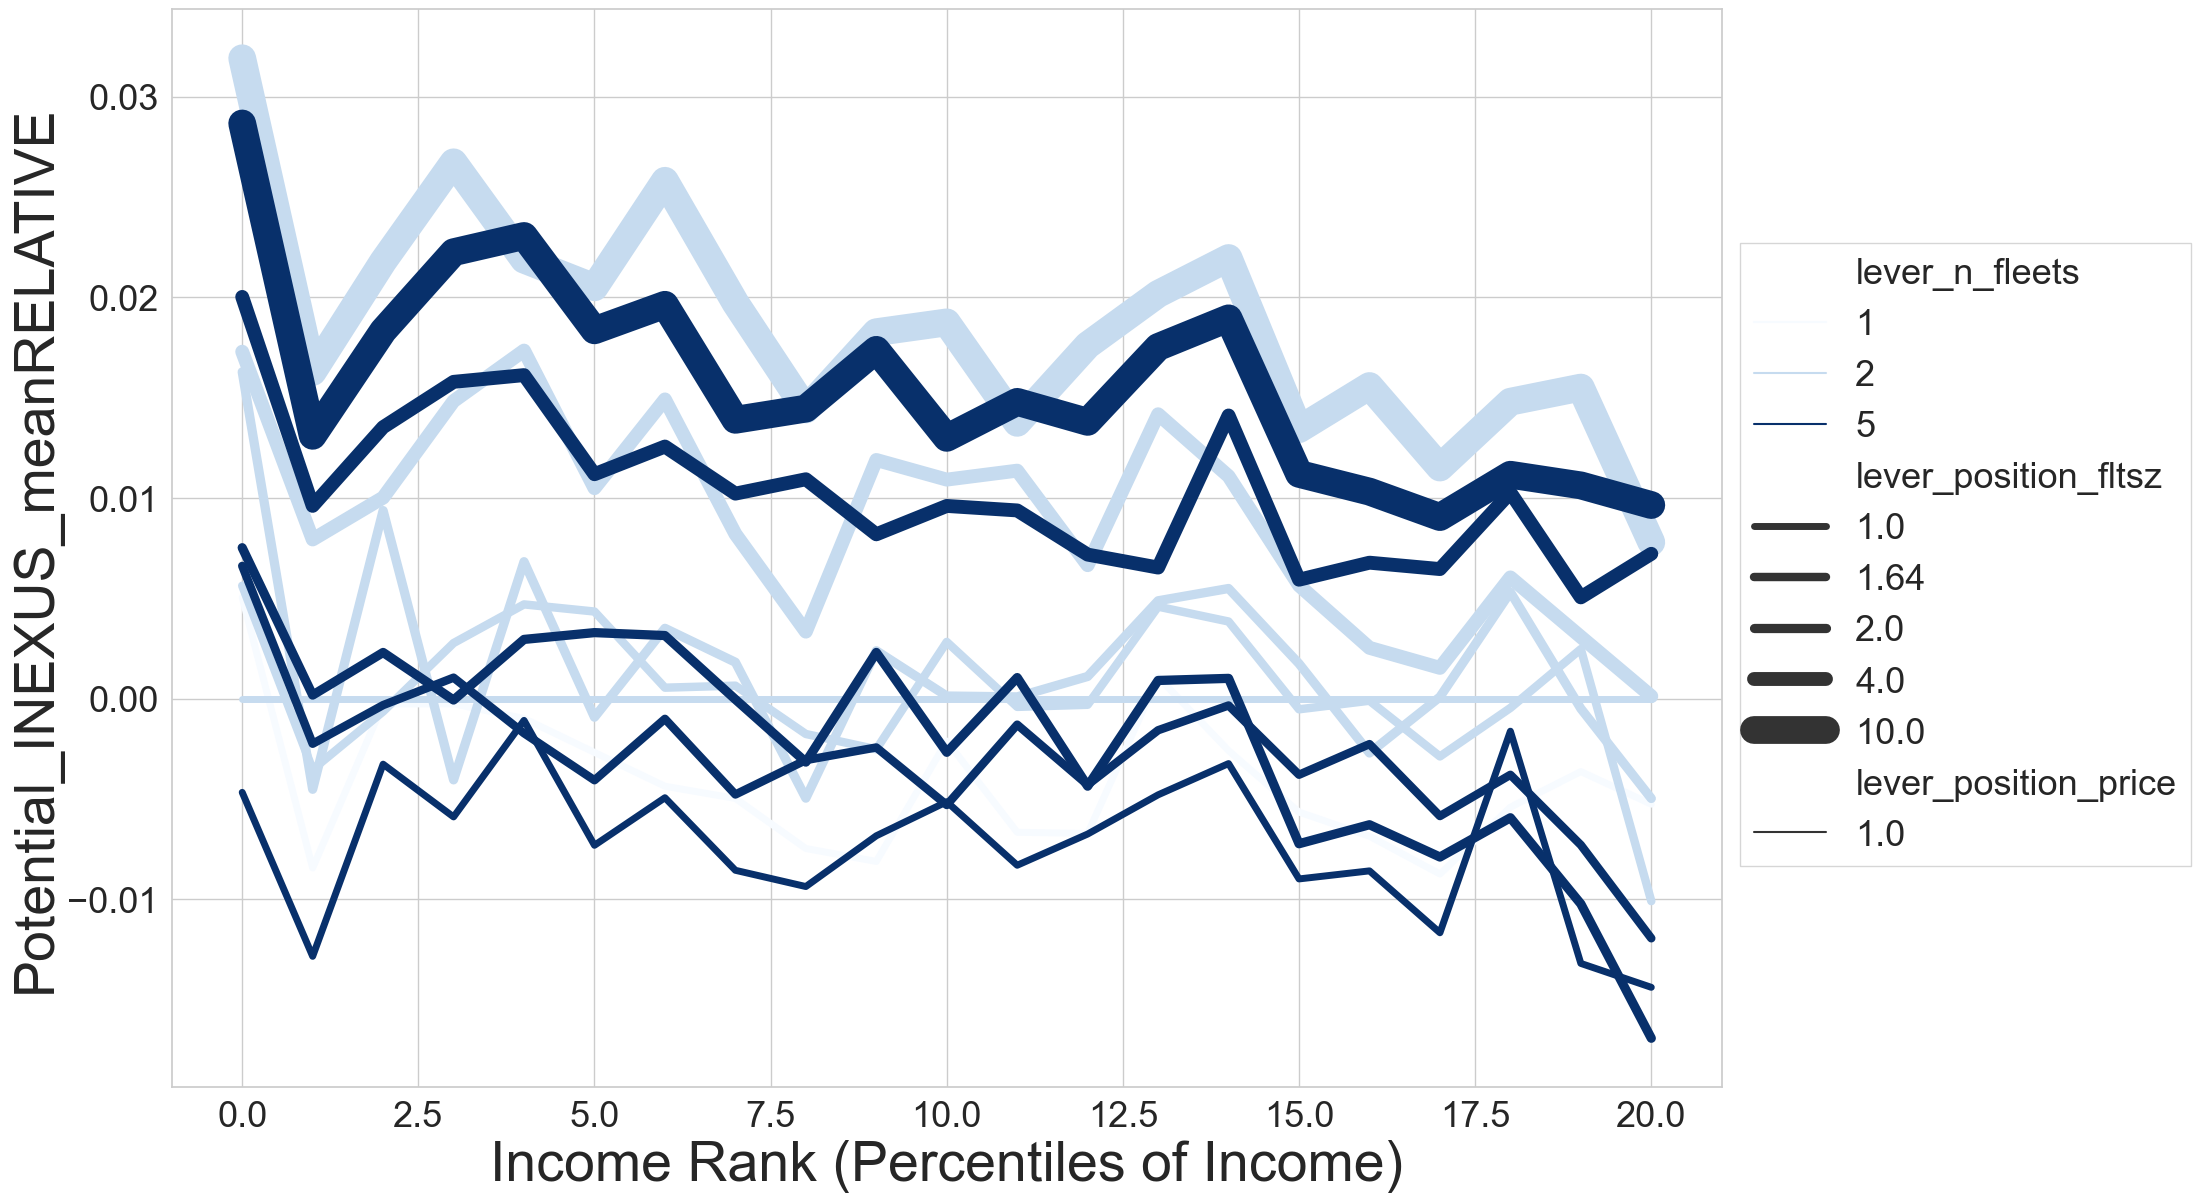

In [9]:
y_variable = temp_varNameRel
graph_Data = df_lorenz.loc[ (df_lorenz['lever_position_price']==1)
                           &(df_lorenz['lever_position_fltsz']>=-1)
                           &(df_lorenz['lever_n_fleets']>=0)]
t_plot = sns.lineplot(data = graph_Data, x = 'incRank', y = y_variable, ci=None, linewidth = 6,
            size ="lever_position_fltsz", sizes=(5,20), hue = 'lever_n_fleets', style = 'lever_position_price',
            palette = 'Blues')
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
t_plot.set_ylabel(y_variable, fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE
import datetime
now = datetime.datetime.now()
filename  = path_output + y_variable + "_fleetsize__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') 
print(filename)
plt.savefig(filename+'.svg', format='svg')
plt.savefig(filename+'.png', dpi=300) # Nazanin -- 1000

## by price

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/Potential_INEXUS_meanRELATIVE_price__03_03_2023_16_00_30


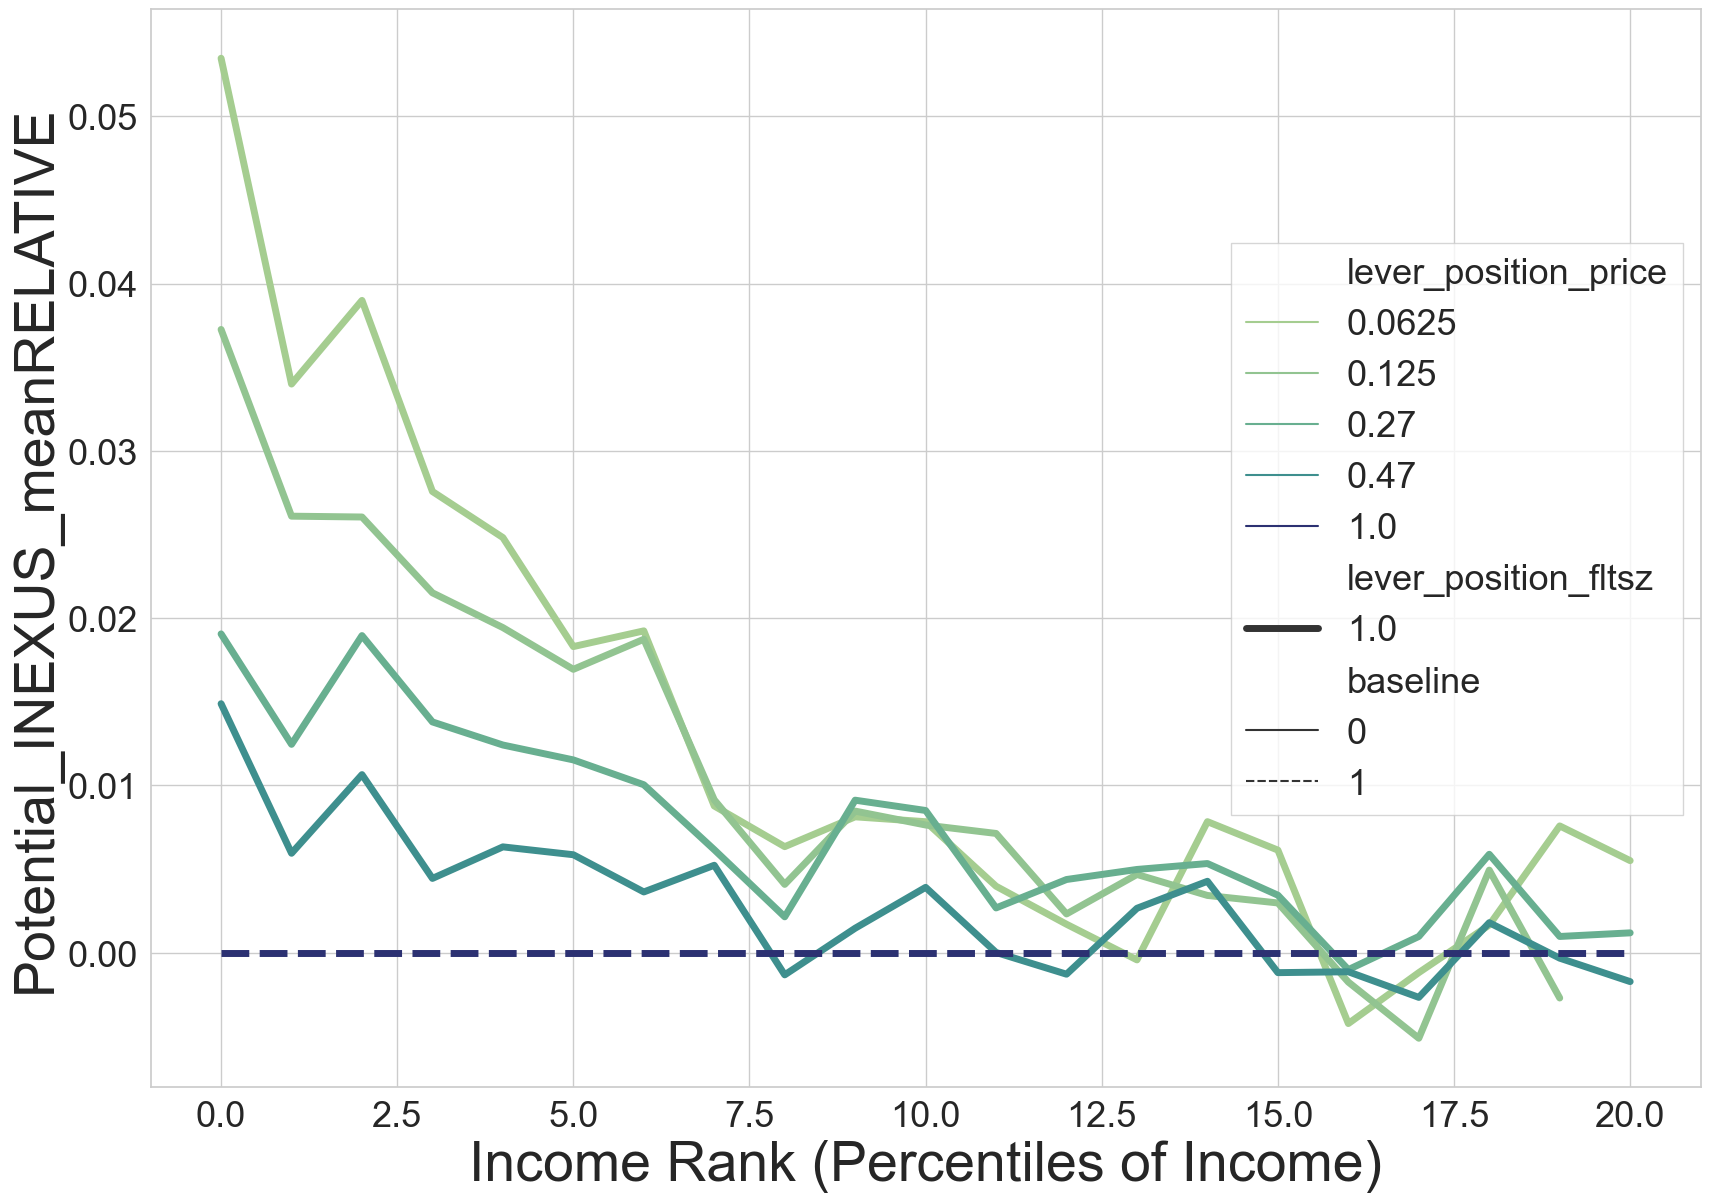

In [10]:
y_variable = temp_varNameRel
graph_Data = df_lorenz.loc[(  (df_lorenz['lever_position_price']>=-1)
                             &((df_lorenz['lever_position_fltsz']==1)|(df_lorenz['lever_position_fltsz']==0))
                             &((df_lorenz['lever_n_fleets'      ]==2)|(df_lorenz['lever_n_fleets'      ]==0)))
                            |(df_lorenz['baseline']==1)]
t_plot = sns.lineplot(data = graph_Data, x = 'incRank', y = y_variable, ci=None, linewidth = 6,
            size ="lever_position_fltsz", sizes=(5,20), hue = 'lever_position_price', style = 'baseline',
            palette = 'crest')
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
t_plot.set_ylabel(y_variable, fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE
import datetime
now = datetime.datetime.now()
filename  = path_output + y_variable + "_price__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') 
print(filename)
plt.savefig(filename+'.svg', format='svg')
plt.savefig(filename+'.png', dpi=300) # Nazanin -- 1000

# Graph Mode

## by fleetsize

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/mode_transit_sum__03_03_2023_16_00_32.svg


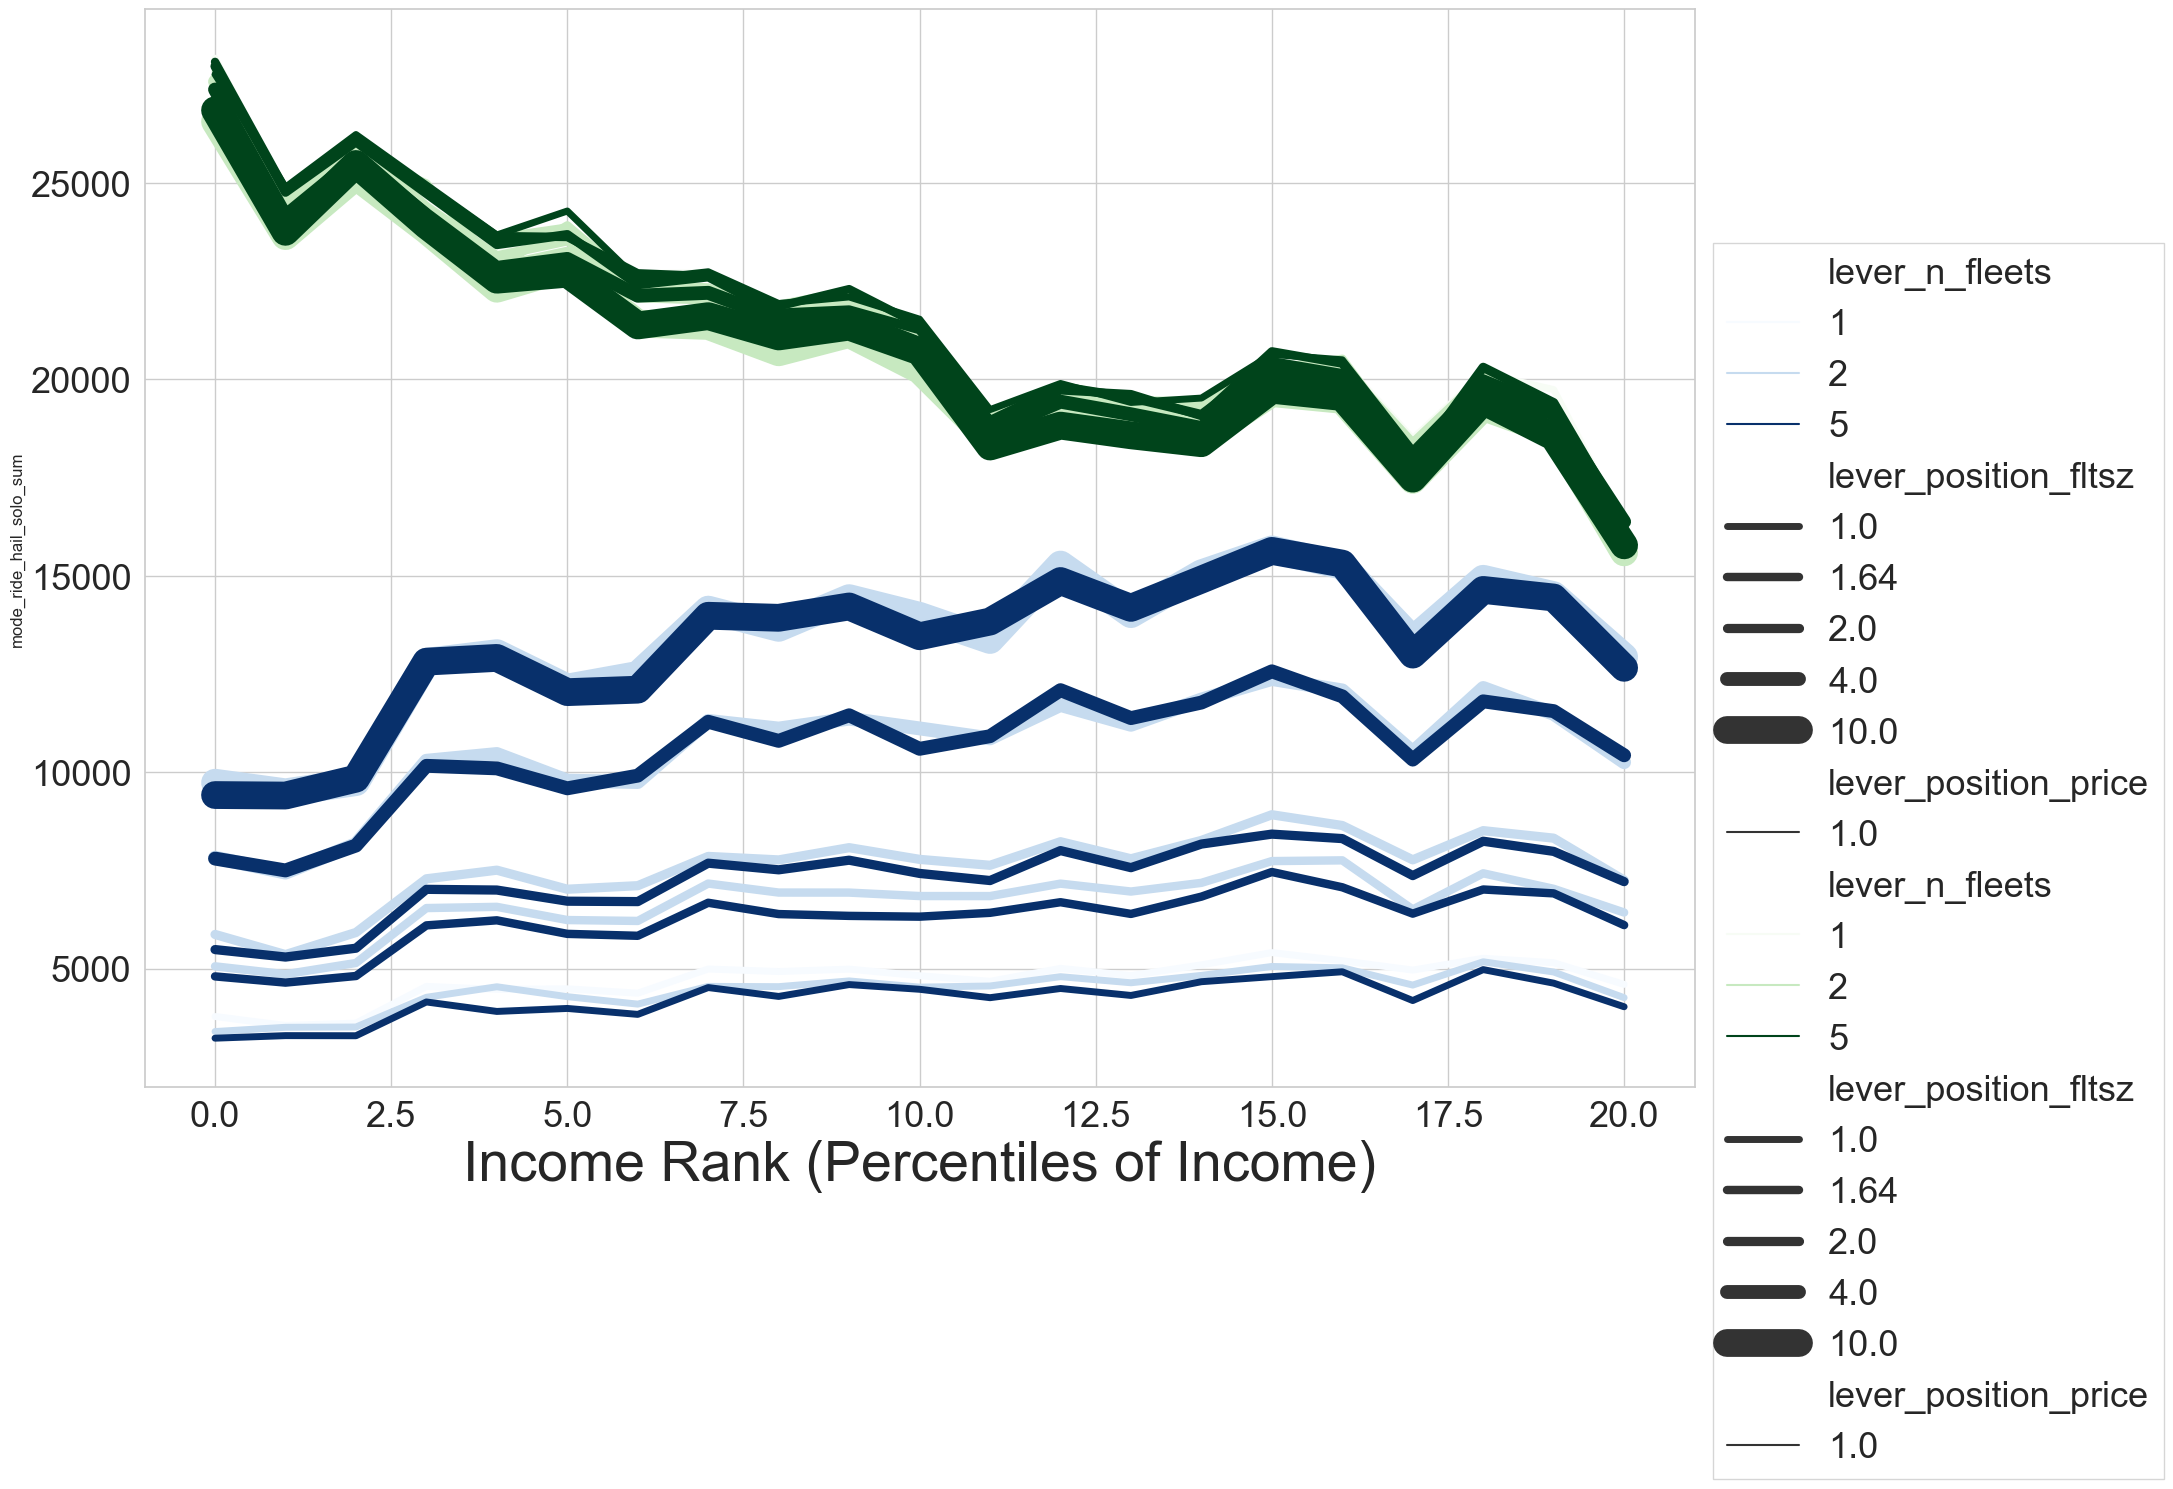

In [11]:
graph_Data = df_lorenz.loc[ (df_lorenz['lever_position_price']==1)
                           &(df_lorenz['lever_position_fltsz']>=-1)
                           &(df_lorenz['lever_n_fleets']>=0)]
y_variable = 'mode_ride_hail_solo_sum' # mode_ride_hail_solo_sum  mode_transit_sum  mode_ride_hail_pooled_sum mode_ride_hail_solo_sum mode_ridehail_total_sum 
t_plot = sns.lineplot(data = graph_Data, x = 'incRank', y = y_variable, ci=None, linewidth = 6,
            size ="lever_position_fltsz", sizes=(5,20), hue = 'lever_n_fleets', style = 'lever_position_price',
            palette = 'Blues')
y_variable = 'mode_transit_sum' # mode_ride_hail_solo_sum  mode_transit_sum  mode_ride_hail_pooled_sum mode_ride_hail_solo_sum mode_ridehail_total_sum 
t_plot = sns.lineplot(data = graph_Data, x = 'incRank', y = y_variable, ci=None, linewidth = 6,
            size ="lever_position_fltsz", sizes=(5,20), hue = 'lever_n_fleets', style = 'lever_position_price',
            palette = 'Greens')
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
#t_plot.set_ylabel( fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE

import datetime
now = datetime.datetime.now()
filename  = path_output + y_variable + "__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)
plt.savefig(filename, format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)

## by price -- Nazanin copy

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/mode_ride_hail_pooled_sum_ReproduceNazanins__03_03_2023_16_00_33.svg


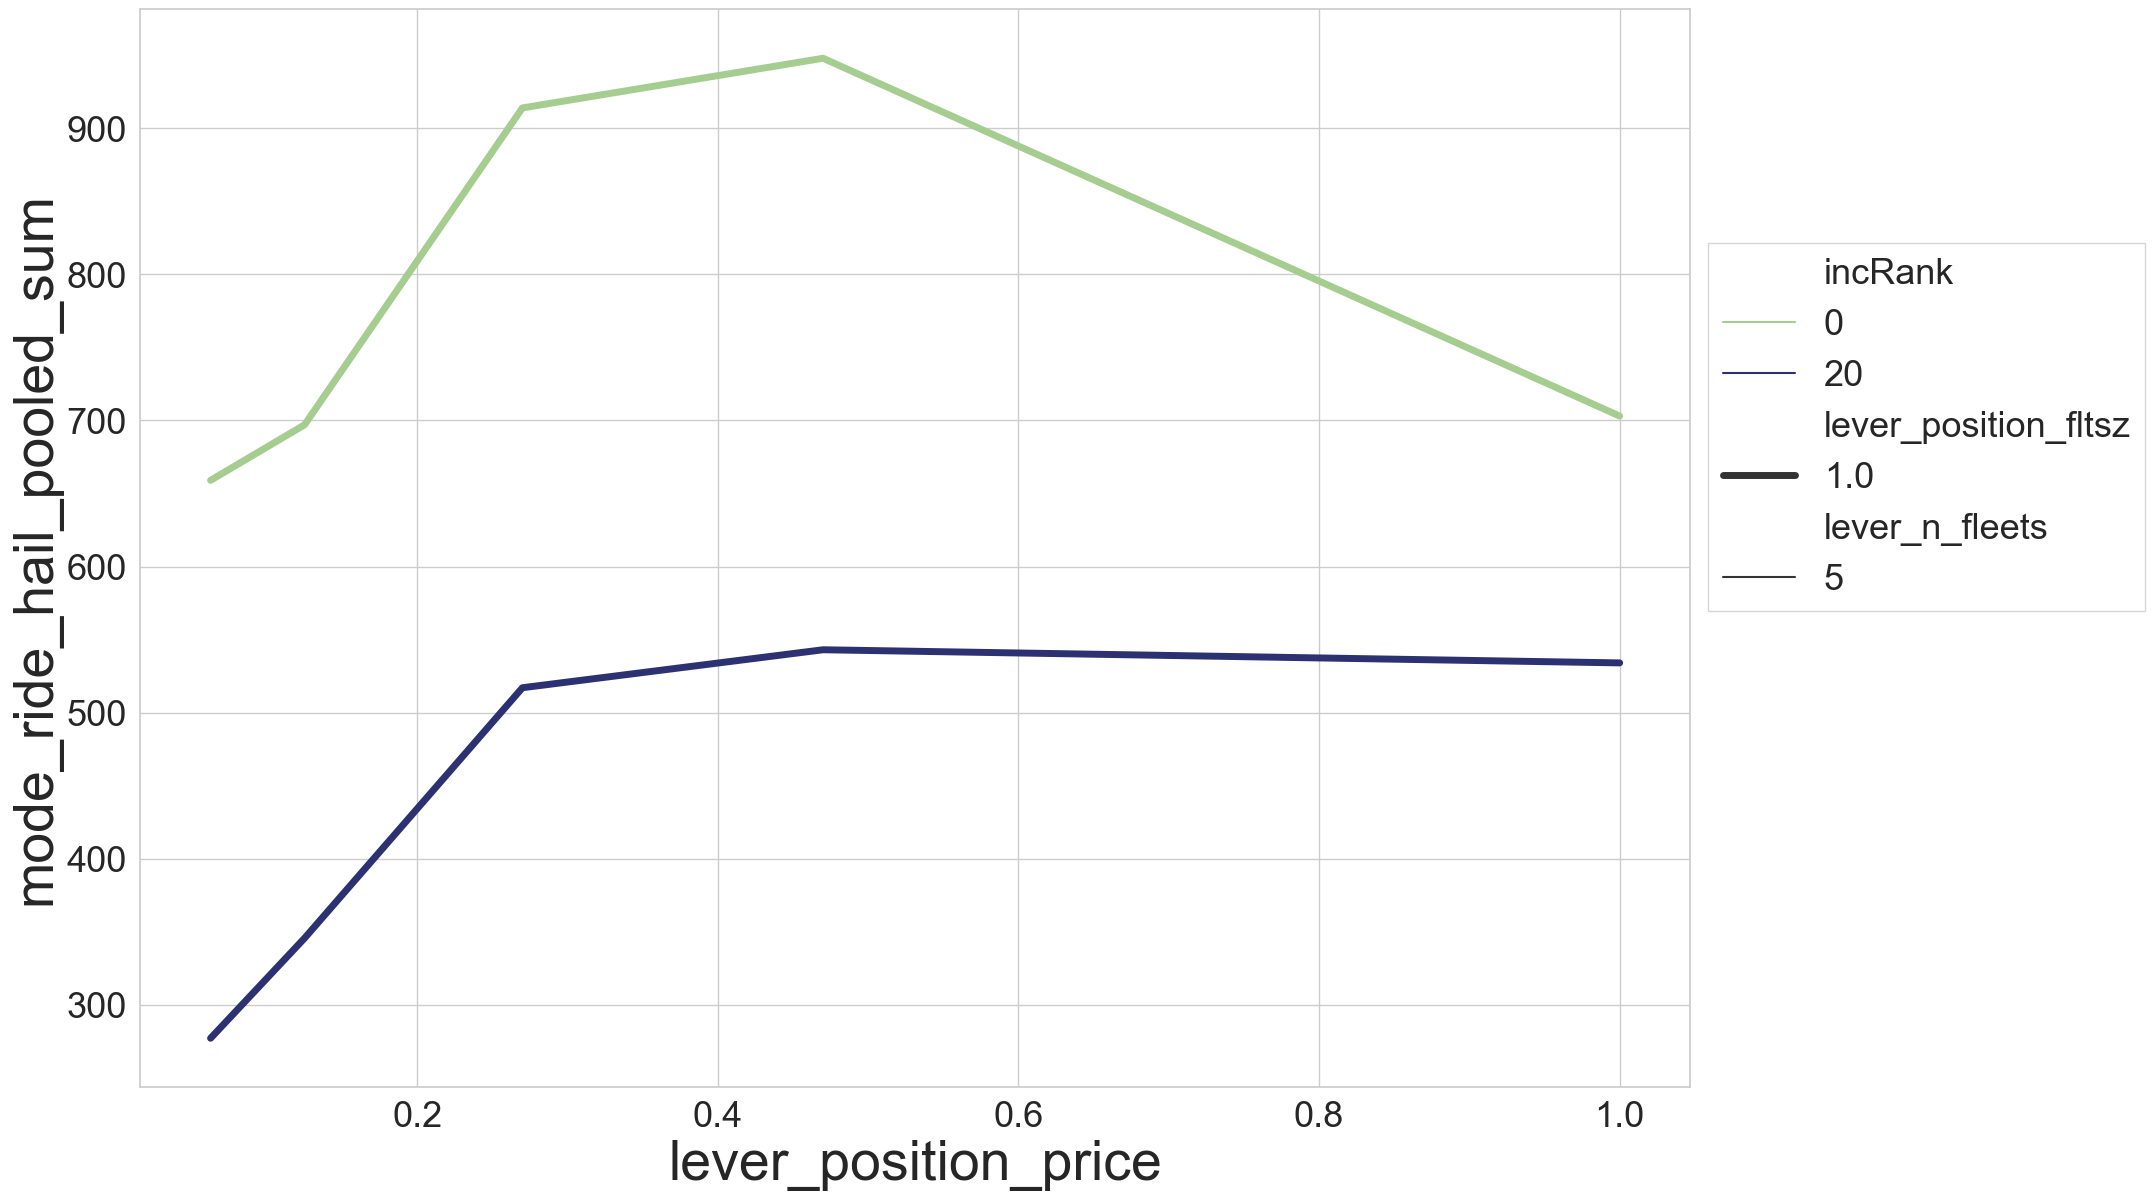

In [12]:
graph_Data = df_lorenz.loc[(  (df_lorenz['lever_position_price']>=-1)
                             &(df_lorenz['lever_position_fltsz']==1)
                             &(df_lorenz['lever_n_fleets'      ]==5)
                               &((df_lorenz['incRank']==0)|(df_lorenz['incRank']==20))
                           &(df_lorenz['lever_position_price']<=99))
                          ]
#cd5collapsed = cd5.groupby(['lever_n_fleets' ,'lever_position_price', 'lever_position_fltsz']).mean().reset_index(drop=False)
 
y_variable = 'mode_ride_hail_pooled_sum' # mode_ride_hail_solo_sum  share_of_trips_transit mode_transit_sum  mode_ride_hail_pooled_sum mode_ride_hail_solo_sum mode_ridehail_total_sum 
x_variable = 'lever_position_price'
t_plot = sns.lineplot(data = graph_Data, x = x_variable, y = y_variable, ci=None, linewidth = 6,          
            size ="lever_position_fltsz", sizes=(5,20), 
            hue = 'incRank', style = 'lever_n_fleets',
            palette = 'crest')
t_plot.set_xlabel(x_variable, fontsize = 40)
t_plot.set_ylabel(y_variable ,fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE

import datetime
now = datetime.datetime.now()
filename  = path_output + y_variable + "_ReproduceNazanins__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)
plt.savefig(filename, format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)

In [13]:
#fig, ax = plt.subplots()
#ax = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position']>-1)|(df_lorenz['lever_position_fleetsize']==1)], x = 'incRank', 
#plt.legend(labels = ['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'],